## Solution plots for the SSY Model

In [1]:
include("src/ez_model.jl")
include("src/ssy_discretized.jl")

compute_fp_ssy

In [2]:
using PyPlot
plt = PyPlot

PyPlot

Default parameter values:

In [18]:
ez = EpsteinZinSSY()
ssy = SSY_default()

SSY{Float64}(0.987, 0.232, 0.0032, 1.0, 0.994, 0.06244997998398398, 0.991, 0.0938083151964686)

In [36]:
K, I, J = 12, 12, 12,

(12, 12, 12)

In [37]:
σ_c_states, σ_z_states, z_states, w = compute_fp_ssy(ez, ssy, K=K, I=I, J=J)

Spec rad = 1.047795711525063 and θ = -15.77204301075269
Beginning iteration


iter, error = 100, 0.044593162179070056
iter, error = 200, 0.0401574126958657
iter, error = 300, 0.03539576206393491
iter, error = 400, 0.03222226388185234
iter, error = 500, 0.03018551090865884
iter, error = 600, 0.02742221007963863
iter, error = 700, 0.02310276119236221
iter, error = 800, 0.017420294271438763
iter, error = 900, 0.01218386832509566
iter, error = 1000, 0.008507955854472726
iter, error = 1100, 0.006104318988214175
iter, error = 1200, 0.004470953030512703
iter, error = 1300, 0.0033091851707673925
iter, error = 1400, 0.002461235618298474
iter, error = 1500, 0.0018348848083000746
iter, error = 1600, 0.0013696705905203999
iter, error = 1700, 0.0010231853878153174
iter, error = 1800, 0.0007647283441016839
iter, error = 1900, 0.0005717503589046657
iter, error = 2000, 0.00042757139563320834
iter, error = 2100, 0.00031980452898849876
iter, error = 2200, 0.0002392291522212986
iter, error = 2300, 0.0001

([0.000313145, 0.00047783, 0.000729125, 0.00111258, 0.00169769, 0.00259051, 0.00395288, 0.00603173, 0.00920386, 0.0140442, 0.0214302, 0.0327005], [0.000111752, 0.000157681, 0.000222486, 0.000313926, 0.000442947, 0.000624994, 0.000881861, 0.0012443, 0.00175569, 0.00247727, 0.00349541, 0.00493199], [-0.000370638 -0.000303249 … 0.000303249 0.000370638; -0.000522967 -0.000427882 … 0.000427882 0.000522967; … ; -0.011593 -0.00948514 … 0.00948514 0.011593; -0.0163576 -0.0133835 … 0.0133835 0.0163576], [981.934, 1003.9, 1025.56, 1046.94, 1068.07, 1088.97, 1109.66, 1130.17, 1150.51, 1170.71  …  167.633, 195.112, 227.15, 264.486, 307.966, 358.554, 417.338, 485.541, 564.514, 655.733])

In [38]:
i, j = 3, 3
x_vals = []
y_vals = []

for k in 1:K
    push!(x_vals, σ_c_states[k])
    m = multi_to_single(k, i, j, J)
    push!(y_vals, w[m])
end

In [39]:
8^3

512

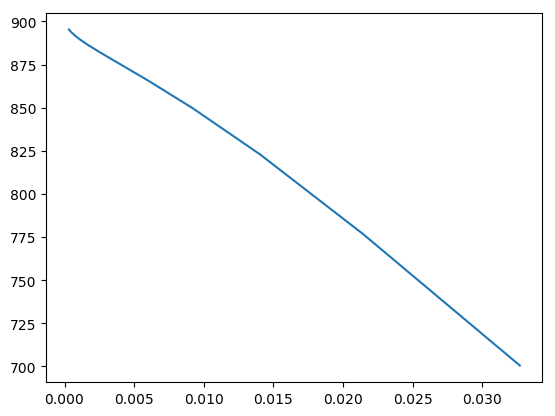

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8655143ef0>

In [40]:
plot(x_vals, y_vals)

In [41]:
k, j = 3, 3
x_vals = []
y_vals = []

for i in 1:I
    push!(x_vals, σ_z_states[i])
    m = multi_to_single(k, i, j, J)
    push!(y_vals, w[m])
end

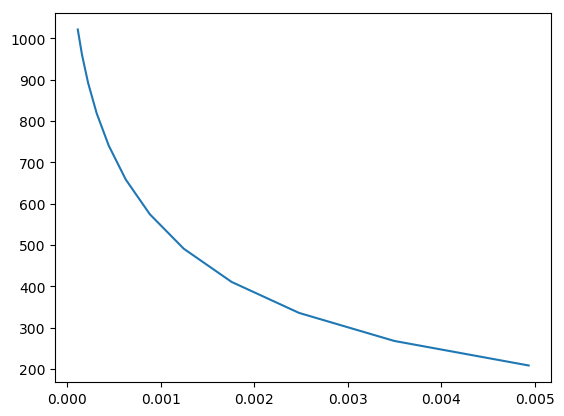

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f86550e7a58>

In [42]:
plot(x_vals, y_vals)

In [43]:
k, i = 6, 6
x_vals = []
y_vals = []

for j in 1:J
    push!(x_vals, z_states[i, j])
    m = multi_to_single(k, i, j, J)
    push!(y_vals, w[m])
end

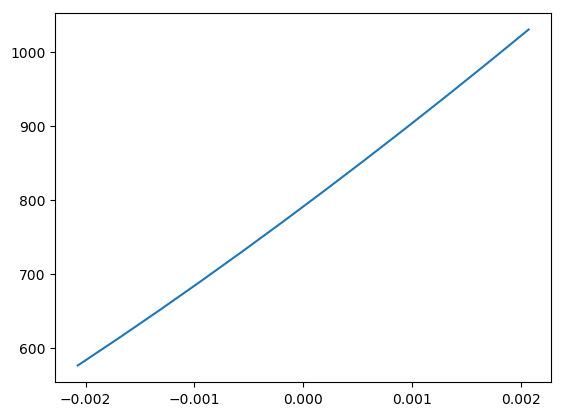

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8655007e48>

In [44]:
plot(x_vals, y_vals)

In [45]:
i = 1

sigc = Array{Float64}(K, J)
z = Array{Float64}(K, J)
W = Array{Float64}(K, J)

for k in 1:K
    for j in 1:J
        sigc[k, j] = σ_z_states[k]
        z[k, j] = z_states[i, j]
        m = multi_to_single(k, i, j, J)
        W[k, j] = w[m]
    end
end

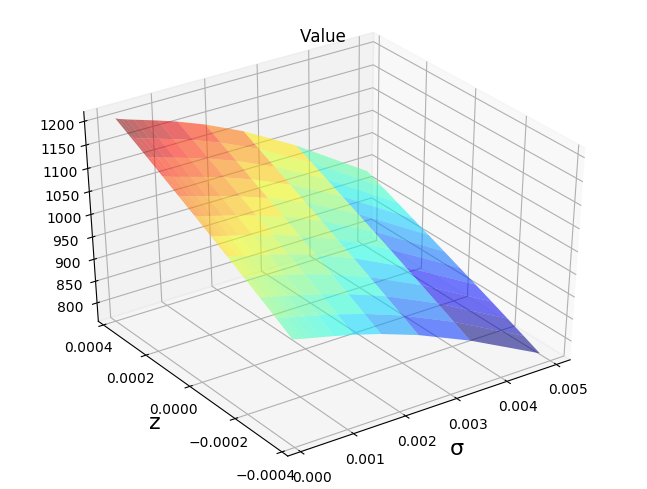

In [60]:

fig = figure(figsize=(8,6))
ax = fig[:gca](projection="3d")
ax[:view_init](36, 235)

cs1 = ax[:plot_surface](sigc,
                    z, 
                    W,
                    cmap=ColorMap("jet"),
                    alpha=0.55)
                    


ax[:set_title]("Value")
ax[:set_xlabel]("σ", fontsize=16)
ax[:set_ylabel]("z", fontsize=16)
ax[:set_yticks]((-0.0004, -0.0002, 0.0, 0.0002, 0.0004))


plt.savefig("foo.pdf")
plt.show()

In [34]:
minimum(W)

1698.8085911402568

In [35]:
maximum(W)

2273.537277772065